In [31]:
from statement_atom_expression import *
import networkx as nx
import matplotlib as plt

p = Atom('p')
q = Atom('q')

not_q = Create.negation(q)
not_q_and_q = Create.conjunction(not_q, q)

to_explore = Create.disjunction(p, not_q_and_q)


def find_equivalence_nodes_from(statement):
    edge_pairs = []
    laws_used = []
    eligible_law = all_eligible_laws_of(statement)
    for equivalence_law in eligible_law:
        print(equivalence_law)
        equivalent_statement = equivalence_law.apply(statement)
        edge_pairs.append((statement, equivalent_statement))
        laws_used.append(equivalence_law)

    return zip(edge_pairs, laws_used)


def search_for_path_between(first_statement, second_statement=None):
    layers = 5

    G = nx.Graph()

    nodes_to_search = [first_statement]
    new_nodes = []
    for current_node in nodes_to_search:
        new_node_edge_pairs = find_equivalence_nodes_from(current_node)

        for edge_pair, law_used in new_node_edge_pairs:
            G.add_edge(edge_pair, object=law_used)

        return G

{(1, 2): Text(-0.21986049922717582, 0.6777114810927078, '3'),
 (1, 3): Text(-3.219819903901855e-05, 0.00011957323434838574, '3'),
 (3, 4): Text(0.21986049922717574, -0.6777114810927078, '3')}

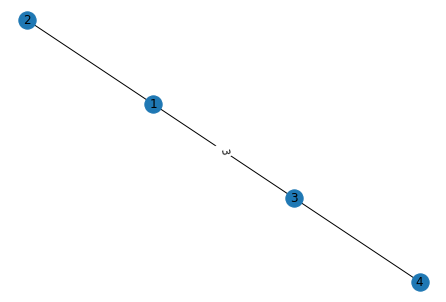

In [32]:
# TESTING GRAPHING WITH LABELS
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(3,4)], weight=3, pos=(2,2))



nx.draw(G, with_labels=1)
pos= nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [34]:
print(55)

55


In [35]:
G = search_for_path_between(to_explore)


nx.draw(G, with_labels=1)
pos= nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)



<class 'statement_atom_expression.CommutativeLaw'>
<class 'statement_atom_expression.DistributiveLaw'>
<class 'statement_atom_expression.ReverseDistributiveLaw'>


AttributeError: 'Atom' object has no attribute 'statement_1'